# DV - Assignment 2
## S10202630 - Keane Dominic Travasso

### Introduction
I am part of the Market Research Team for Fitness Trainer Pte Ltd, which is a retail business specializing in the sales of stationary bikes. I have been tasked to investigate whether there are differences across the models in respect to the customer characteristics based on the data collected across the past 3 months. I will be using Jupyter Notebook and Python to create my visualizations and dashboards.

### Project Objectives
For this project, I will be coming up with 3 dashboards. The first being, the Customer Demographic Dashboard, followed by the Customer Fitness Dashboard and lastly, the Data Relationship Dashboard. These dashboards will incorporate multiple visualizations that will analyze the Customer Characteristics based on the bicycle products purchased.

## Getting Information on the Dataset Provided

In order to Visualize the data, I must first learn more about the dataset. To do this, the import commands must first be run in order to get the libraries required. From there, the Excel sheet needs to be read.

After doing this the information on the data set can then be printed out.

In [1]:
# Import Commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
%matplotlib inline

# Read the csv file and recognize 'na' as NaN
df = pd.read_csv('Fitness Trainer Series _ April 2021.csv', na_values = 'na') # recognize 'na' in dataset as NaN in dataframe

# Create a copy of the DataFrame, df_bkup
df_bkup = df.copy()

# Convert column names to standardized, snake_case
df.columns = [x.lower().replace(' ','_') for x in df.columns]

# Print the Information about the Dataset
print('#Information about the Dataset')
print(df.info())

# Print the statistical breakdown of the dataset
print('\n')
print('#Statistical Information about the Dataset')
print(df.describe())

# Check unique data values of the non-float64 columns
print('\n')
print('#Information about the Dataset')
print(df['product'].unique().tolist())
print(df['branch'].unique().tolist())
print(df['gender'].unique().tolist())
print(df['maritalstatus'].unique().tolist())
print('\n#Count of Null Values')
print(df.isnull().sum().sort_values(ascending=False))

#Information about the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product        183 non-null    object 
 1   branch         183 non-null    object 
 2   age            174 non-null    float64
 3   gender         180 non-null    object 
 4   education      180 non-null    float64
 5   maritalstatus  180 non-null    object 
 6   usage          172 non-null    float64
 7   fitness        180 non-null    float64
 8   income         180 non-null    float64
 9   miles          180 non-null    float64
dtypes: float64(6), object(4)
memory usage: 14.4+ KB
None


#Statistical Information about the Dataset
              age   education       usage     fitness         income  \
count  174.000000  180.000000  172.000000  180.000000     180.000000   
mean    28.781609   15.572222    3.476744    3.311111   53719.577778   
std      7.062766

## Data Preparation

### Removing NA rows
In the dataset, there are rows where only the Product name and the Branch name are specified. The rest of the Data Columns are left as NA.

Here I am assuming that those data rows were accidentally added to the data set hence, why they were removed.

In [2]:
# Data Cleaning (Dealing with NaN values and the DataType of the Data)

# Remove Rows where Gender was NaN as those rows were also missing all the other data except for Branch.
# Here I am assuming that those data rows were accidentally added to the data set hence, why they were removed.
df = df.dropna(axis=0, subset=['gender'])

### Replacing Unwanted Values

The Marital Status column contains some unwanted values. As seen from the list of unique values for each columns, the Marital Status column has the values 'S', 'P', 'Single' and 'Partnered'. 

To ensure that the dataset is clean, I need to replace the values of 'S' and 'P' with 'Single' and 'Partnered' respectively. To do this I used mapping.

In [3]:
# Using Map to replace 'S' and 'P' with 'Single' and 'Partnered' respectively.
# Here I am assuming that the rows with the maritalstatus set as NaN are 'Single'.
msMap = {'Single':'Single','Partnered':'Partnered','S':'Single','P':'Partnered'}
df['maritalstatus']=df['maritalstatus'].map(msMap)

### Filling in the Remaining NA values

The remaining NA values left can be filled in using the median values for the respective columns

In [4]:
# As the dataset is not that large, I have decided to replace the NaN age values with the median of the age column, 26.
# This is done instead of replacing the value with the mean as there is a large difference between the 50% and max value
# as compared to the 50% and min value.
df['age'].fillna(df['age'].median(), inplace=True)

# As the dataset is not that large, I have decided to replace the NaN usage values with the median of the usage column, 3.
# This is done as both the mean rounded to whole number and the median are the same number, 3.
df['usage'].fillna(df['usage'].median(), inplace=True)

### Converting Data Columns to Integer

To end the data cleaning process, I need to convert the relevant data columns to be an Integer. This is done using the python astype() command.

In [5]:
df['age'] = df['age'].astype(int)
df['usage'] = df['usage'].astype(int)
df['education'] = df['education'].astype(int)
df['income'] = df['income'].astype(int)
df['miles'] = df['miles'].astype(int)

### Final Check

The isnull().sum() can be used to print out all the columns to check if there are any NA values in them.

Here, I have also created 2 color schemes which will be used later on when developing the visualizations.

In [6]:
print(df.isnull().sum().sort_values(ascending=False))

productColors = ['#a1ffe1','#ffcd87','#da8fff']
fitnessColors = ['#B0E2FF', '#67C8FF','#63B8FF','#4682B4','#42647F']

product          0
branch           0
age              0
gender           0
education        0
maritalstatus    0
usage            0
fitness          0
income           0
miles            0
dtype: int64


## Visualizations

### 1. Which products are the most popular amongst customers?

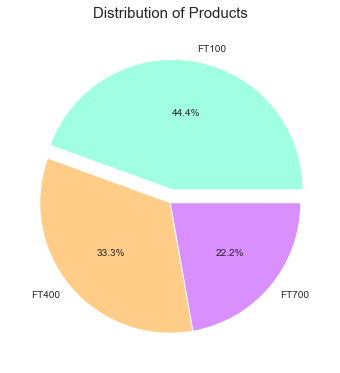

In [7]:
# Pie Chart to show the distribution of the products.
# This chart shows how popular the products are among the customers.
# Plot Figure & Figure Style
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Get the Count of the Each Product
productDist = df.groupby('product')['branch'].count()
# Sort the values by ascending count.
productDist.sort_values(ascending=False, inplace=True)
# Get the list of the Product Names
products = productDist.index

# Plot the Pie Chart
plt.pie(productDist, explode=(0.1,0,0),
        labels=products, autopct='%1.1f%%', colors=productColors)
plt.title("Distribution of Products\n", fontsize=15)

plt.show()

### 2. What is the distribution of the Customers’ Marital Status for all the products? 
### 3. Which products do Customers with a higher income tend to get?

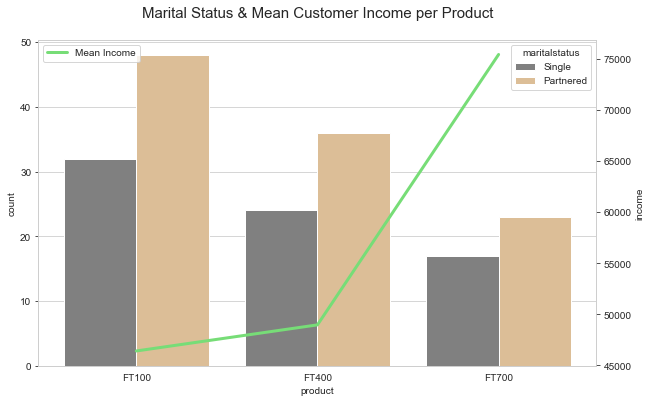

In [8]:
# Dual Axis Chart to Show the Distribution of Marital Status and how the Mean Income changes per Product
# Plot Figure & Figure Style
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Plot Marital Status Bar chart
ax2 = sns.countplot(x="product", hue="maritalstatus", palette=['#808080','#E8BF8B'], data=df)
# Plot Mean Income line chart over Bar Chart
ax7 = ax2.twinx()
ax7 = sns.lineplot(x='product', y='income', data=df, ci=None, color='#77dd77', linewidth = 3)
ax7.grid(False)
ax7.legend(['Mean Income'],loc='upper left')
ax2.set_title("Marital Status & Mean Customer Income per Product\n", fontsize=15)

plt.show()

### 4. What is the distribution of the Customer’s Gender for all the products? 

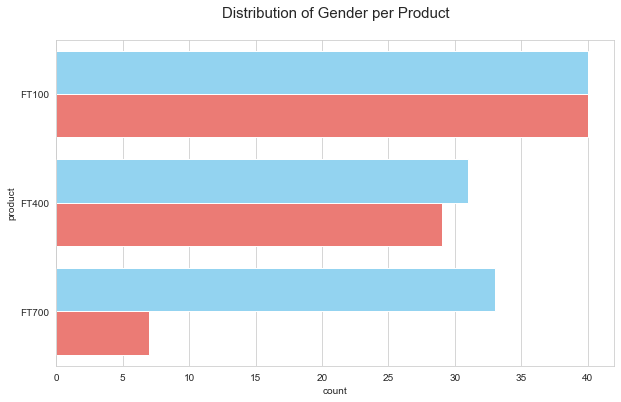

In [9]:
# Bar Chart to show the distribution of CUstomer's Gender for all Products
# Plot Figure & Figure Style
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Plot the Bar Chart
genderProduct = sns.countplot(y='product', hue='gender', palette=['#84d9ff','#ff6961'], data=df)
genderProduct.get_legend().remove()
genderProduct.set_title("Distribution of Gender per Product\n", fontsize=15)

plt.show()

### What is the distribution of the Customer’s Age for all the products?

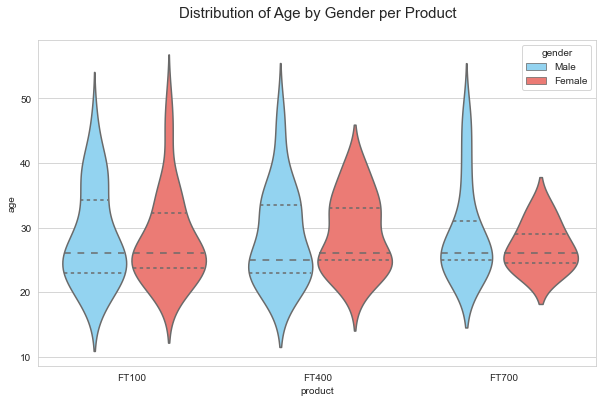

In [10]:
# Violin Chart to Show the Distribution of the Age by Gender for all Products
# Plot Figure & Figure Style
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Plot the Violin Chart
ax4 = sns.violinplot(x='product', y='age', inner='quartile', hue='gender', palette=['#84d9ff','#ff6961'], data=df)
ax4.set_title("Distribution of Age by Gender per Product\n", fontsize=15)

plt.show()

### 6. What is the distribution of the products sold at the different branches?
### 7. Which branch do Customers with a higher income tend to shop at?

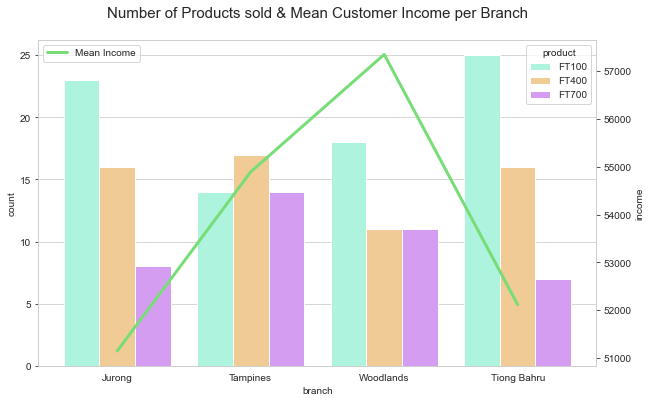

In [11]:
# Dual Axis Chart to Show the distribution of Products and Mean Income by Branch
# Plot Figure & Figure Style
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Plot the Bar Chart
ax5 = sns.countplot(x='branch', hue='product', data=df, palette=productColors)
# Plot the Line Chart
ax7 = ax5.twinx()
ax7 = sns.lineplot(x='branch', y='income', data=df, ci=None, color='#77dd77', linewidth = 3)
ax7.grid(False)
ax7.legend(['Mean Income'],loc='upper left')
ax5.set_title("Number of Products sold & Mean Customer Income per Branch\n", fontsize=15)

plt.show()

### 8. Which product gets used the most in a week by the Customers?

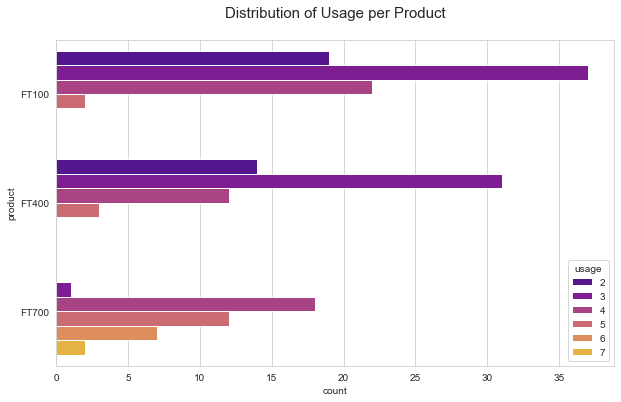

In [12]:
# Bar Chart to show the distribution in the usage for each product
# Plot Figure & Figure Style
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Plot the Bar Chart
ax1 = sns.countplot(y='product', hue='usage', data=df, palette='plasma')
ax1.set_title("Distribution of Usage per Product\n", fontsize=15)

plt.show()

### 9. How fit are the customers who bought each product?
### 10. What are the mean miles that customers said they would cover for all the products?

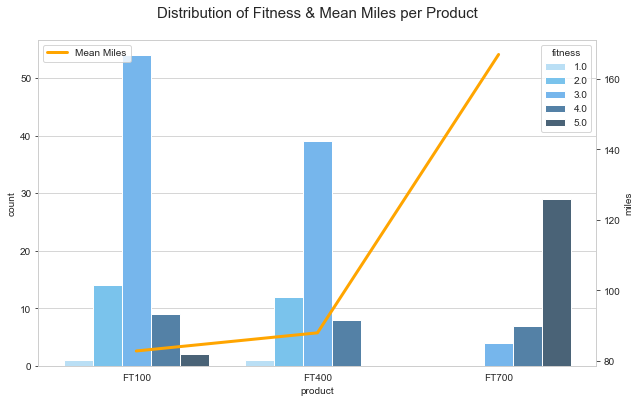

In [13]:
# Dual Axis Chart to Show the distribution of fitness and mean miles per product
# Plot Figure & Figure Style
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Plot the Bar Chart
ax2 = sns.countplot(x='product', hue='fitness', data=df, palette=fitnessColors)
# Plot the Line Chart
ax7 = ax2.twinx()
ax7 = sns.lineplot(x='product', y='miles', data=df, ci=None, color='#FFA500', linewidth = 3)
ax7.grid(False)
ax7.legend(['Mean Miles'],loc='upper left')
ax2.set_title("Distribution of Fitness & Mean Miles per Product\n", fontsize=15)

plt.show()

### 11. What is the distribution of the usage for each product?

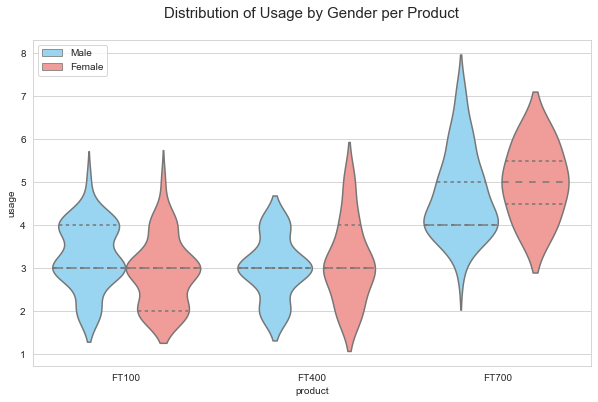

In [14]:
# Violin Chart to show the distribution in the usage by gender, based on the product
# Plot Figure & Figure Style
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Plot the Violin Chart
ax3 = sns.violinplot(x='product', y='usage', inner='quartile', hue='gender', palette=['#8adbff','#ff908a'], data=df)
ax3.legend(loc='upper left')
ax3.set_title("Distribution of Usage by Gender per Product\n", fontsize=15)

plt.show()

### 12. What is the distribution of the Fitness level of Customers for each product?

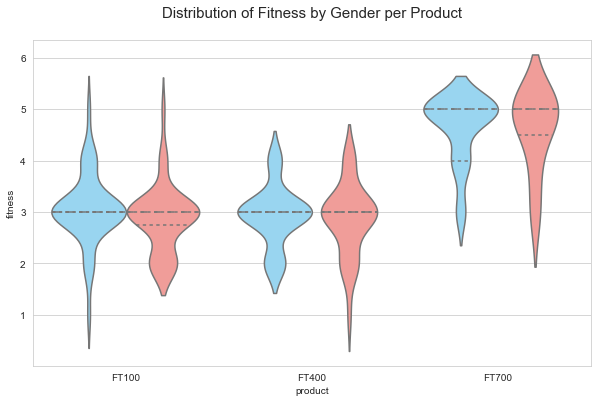

In [15]:
# Violin Chart to show the distribution in the fitness by gender, based on the product
# Plot Figure & Figure Style
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Plot the Violin Chart
ax4 = sns.violinplot(x='product', y='fitness', inner='quartile', hue='gender', palette=['#8adbff','#ff908a'], data=df)
ax4.get_legend().remove()
ax4.set_title("Distribution of Fitness by Gender per Product\n", fontsize=15)

plt.show()

### 13. What is the distribution of the miles covered by the Customers for each product?

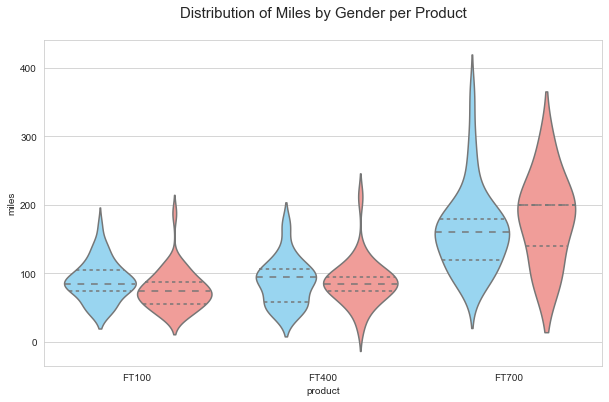

In [16]:
# Violin Chart to show the distribution in the miles by gender, based on the product
# Plot Figure & Figure Style
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Plot the Violin Chart
ax5 = sns.violinplot(x='product', y='miles', inner='quartile', hue='gender', palette=['#8adbff','#ff908a'], data=df)
ax5.get_legend().remove()
ax5.set_title("Distribution of Miles by Gender per Product\n", fontsize=15)

plt.show()

### 14. How does the miles covered by each product compare to each other?

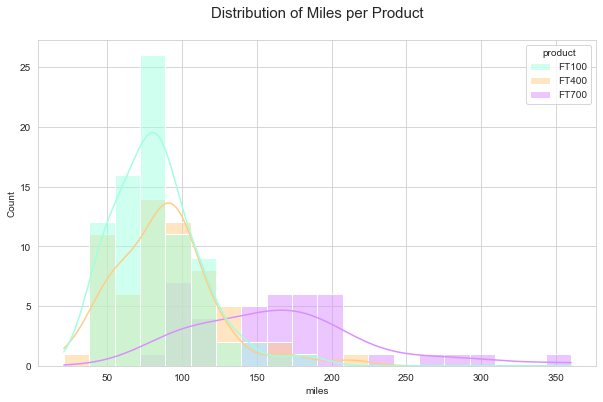

In [17]:
# Histogram Plot to show the Distribution of Miles per product
# Plot Figure & Figure Style
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Plot the Histogram Plot
ax6 = sns.histplot(x='miles', hue='product', data=df, kde=True, palette=productColors)
ax6.set_title("Distribution of Miles per Product\n", fontsize=15)

plt.show()

### 15. What is the correlation between all the Customer Characteristic Data in the dataset?

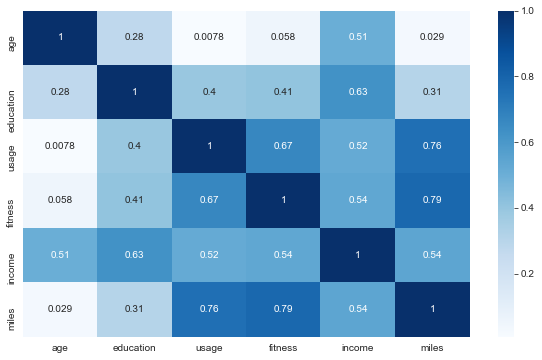

In [18]:
# Heatmap to show the correlation in the data
# Plot Figure & Figure Style
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

corr = df.corr()
# Plot the Heatmap
sns.heatmap(corr, cmap="Blues", annot=True)

plt.show()

### 16. What is the correlation between the Fitness Level of the Customers and the Miles covered?

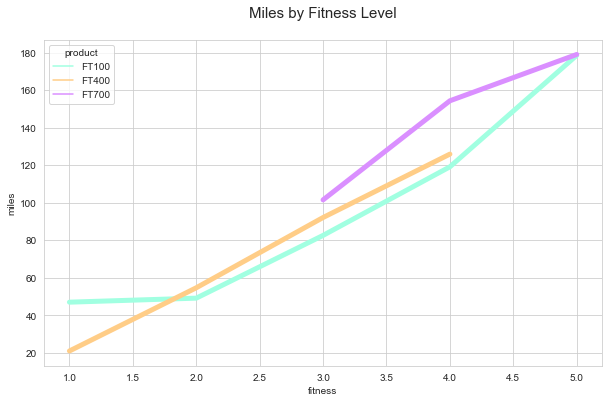

In [19]:
# Line Chart to show the Miles covered per fitness level, based on the product
# Plot Figure & Figure Style
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Plot the Line Chart
ax2 = sns.lineplot(x='fitness', y='miles', data=df, ci=None, hue='product', linewidth = 5, palette=productColors)
ax2.set_title("Miles by Fitness Level\n", fontsize=15)

plt.show()

### 17. What is the correlation between the number of Usage days and the Miles covered?

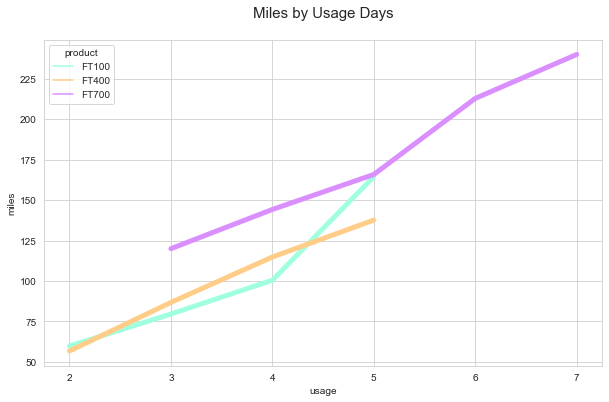

In [20]:
# Line Chart to show the Miles covered per usage days, based on the product
# Plot Figure & Figure Style
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Plot the Line Chart
ax3 = sns.lineplot(x='usage', y='miles', data=df, ci=None, hue='product', linewidth = 5, palette=productColors)
ax3.set_title("Miles by Usage Days\n", fontsize=15)

plt.show()

### 18. What is the correlation between the number of years of Education received by the customers and the income they make?

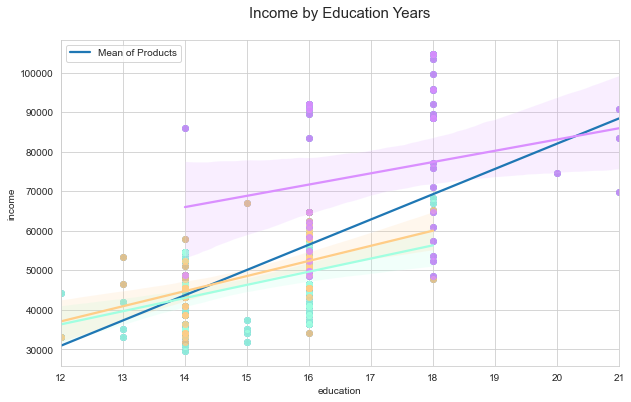

In [21]:
# Reg Plot to show the trend in Education Years and Income for all products
# Plot Figure & Figure Style
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Plot the Reg Plot
ax4 = sns.regplot(x='education', y='income', data=df, ci=False)
ax4 = sns.regplot(x='education', y='income', data=df[df['product']=='FT100'], color='#a1ffe1')
ax4 = sns.regplot(x='education', y='income', data=df[df['product']=='FT400'], color='#ffcd87')
ax4 = sns.regplot(x='education', y='income', data=df[df['product']=='FT700'], color='#da8fff')
ax4.legend(['Mean of Products'],loc='upper left')
ax4.set_title("Income by Education Years\n", fontsize=15)

plt.show()

## Dashboard

### Customer Demographic Data

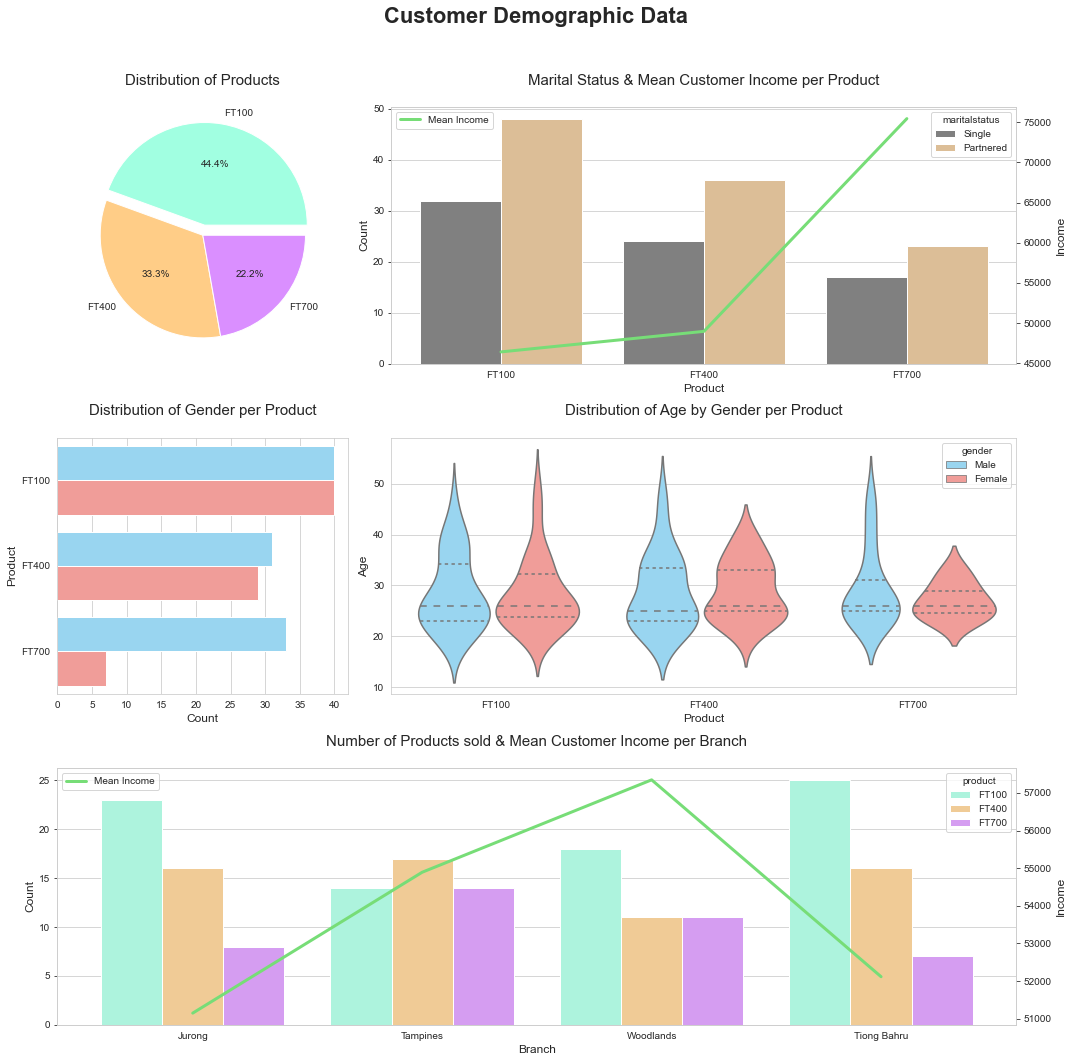

In [22]:
fig = plt.figure(tight_layout=True)
gs = GridSpec(nrows=3, ncols=3, figure=fig)
fig.suptitle('Customer Demographic Data\n\n', fontsize=22, fontweight='bold')
fig.set_size_inches(15,15)

ax1 = fig.add_subplot(gs[0, 0])
ax1.pie(productDist, explode=(0.1,0,0),
        labels=products, autopct='%1.1f%%', colors=productColors)
ax1.set_title("Distribution of Products\n", fontsize=15)

ax2 = fig.add_subplot(gs[0, 1:])
ax2 = sns.countplot(x="product", hue="maritalstatus", palette=['#808080','#E8BF8B'], data=df)
ax6 = ax2.twinx()
ax6 = sns.lineplot(x='product', y='income', data=df, ci=None, color='#77dd77', linewidth = 3)
ax6.grid(False)
ax6.legend(['Mean Income'],loc='upper left')
ax2.set_title("Marital Status & Mean Customer Income per Product\n", fontsize=15)
ax2.set_ylabel('Count', fontsize = 12)
ax2.set_xlabel('Product', fontsize = 12)
ax6.set_ylabel('Income', fontsize = 12)

ax3 = fig.add_subplot(gs[1, 0])
ax3 = sns.countplot(y='product', hue='gender', palette=['#8adbff','#ff908a'], data=df)
ax3.set_title("Distribution of Gender per Product\n", fontsize=15)
ax3.get_legend().remove()
ax3.set_ylabel('Product', fontsize = 12)
ax3.set_xlabel('Count', fontsize = 12)

ax4 = fig.add_subplot(gs[1, 1:])
ax4 = sns.violinplot(x='product', y='age', inner='quartile', hue='gender', palette=['#8adbff','#ff908a'], data=df)
ax4.set_title("Distribution of Age by Gender per Product\n", fontsize=15)
ax4.set_ylabel('Age', fontsize = 12)
ax4.set_xlabel('Product', fontsize = 12)

ax5 = fig.add_subplot(gs[2,:])
ax5 = sns.countplot(x='branch', hue='product', data=df, palette=productColors)
ax7 = ax5.twinx()
ax7 = sns.lineplot(x='branch', y='income', data=df, ci=None, color='#77dd77', linewidth = 3)
ax7.grid(False)
ax7.legend(['Mean Income'],loc='upper left')
ax5.set_title("Number of Products sold & Mean Customer Income per Branch\n", fontsize=15)
ax5.set_ylabel('Count', fontsize = 12)
ax5.set_xlabel('Branch', fontsize = 12)
ax7.set_ylabel('Income', fontsize = 12)

plt.show()

fig.savefig('custDemographic.png', dpi = 300)

The first Dashboard I created using the Customer Characteristics data was the Customer Demographic Dashboard. This dashboard mainly covers how the demographic of the customer changes based on the product. This can be in the form of age, gender, marital status, income, etc. 

Through the use of this dashboard, the marketing team will understand who the customers the bicycles are being bought by. This will allow for better marketing tactics as the team will know who to target and also will know which areas they need to promote the products more in are.

### Customer Fitness Data

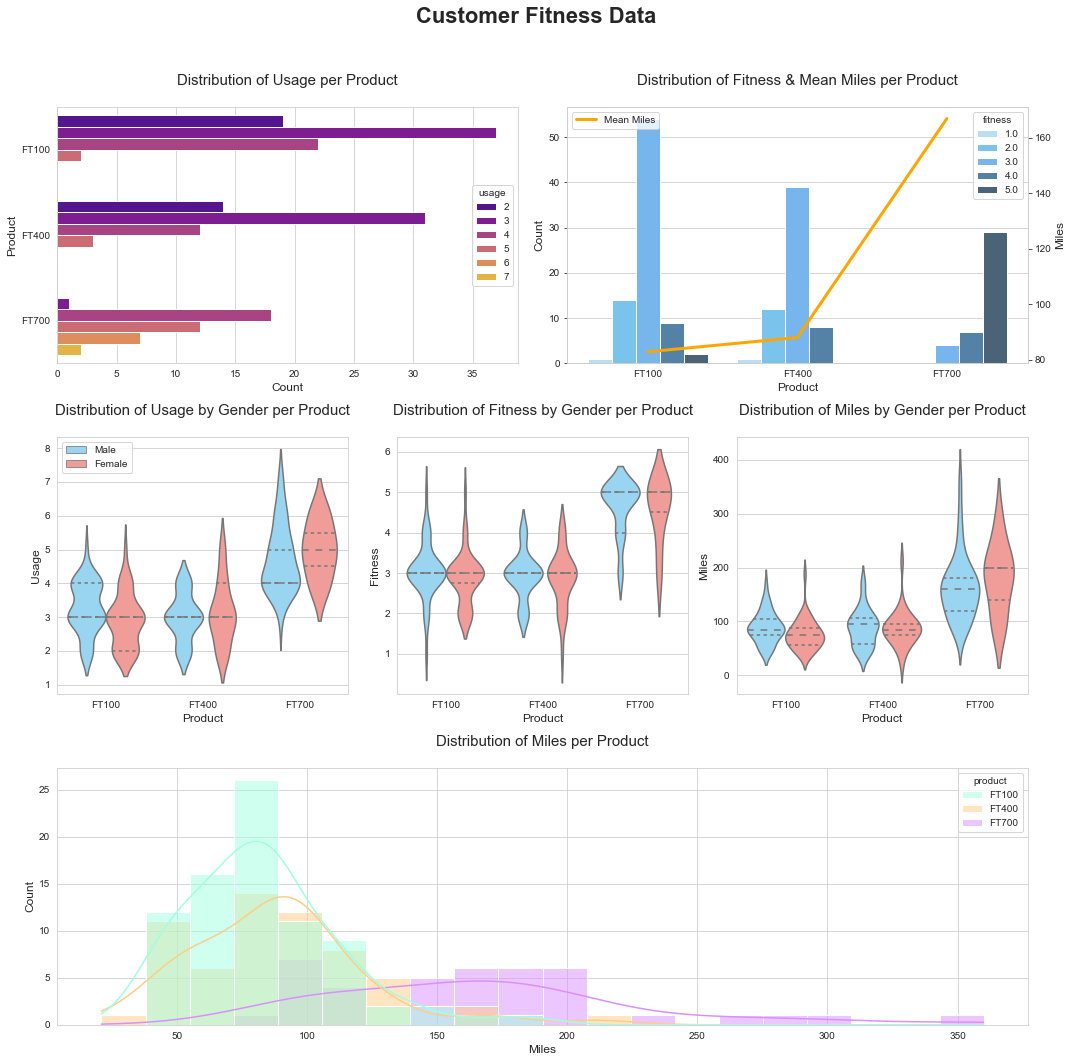

In [23]:
fig = plt.figure(tight_layout=True)
gs = GridSpec(nrows=6, ncols=6, figure=fig)
fig.suptitle('Customer Fitness Data\n\n', fontsize=22, fontweight='bold')
fig.set_size_inches(15,15)

ax1 = fig.add_subplot(gs[0:2, 0:3])
ax1 = sns.countplot(y='product', hue='usage', data=df, palette='plasma')
ax1.set_title("Distribution of Usage per Product\n", fontsize=15)
ax1.set_ylabel('Product', fontsize = 12)
ax1.set_xlabel('Count', fontsize = 12)

ax2 = fig.add_subplot(gs[0:2, 3:])
ax2 = sns.countplot(x='product', hue='fitness', data=df, palette=fitnessColors)
ax7 = ax2.twinx()
ax7 = sns.lineplot(x='product', y='miles', data=df, ci=None, color='#FFA500', linewidth = 3)
ax7.grid(False)
ax7.legend(['Mean Miles'],loc='upper left')
ax2.set_title("Distribution of Fitness & Mean Miles per Product\n", fontsize=15)
ax2.set_ylabel('Count', fontsize = 12)
ax2.set_xlabel('Product', fontsize = 12)
ax7.set_ylabel('Miles', fontsize = 12)

ax3 = fig.add_subplot(gs[2:4, 0:2])
ax3 = sns.violinplot(x='product', y='usage', inner='quartile', hue='gender', palette=['#8adbff','#ff908a'], data=df)
ax3.legend(loc='upper left')
ax3.set_title("Distribution of Usage by Gender per Product\n", fontsize=15)
ax3.set_ylabel('Usage', fontsize = 12)
ax3.set_xlabel('Product', fontsize = 12)

ax4 = fig.add_subplot(gs[2:4, 2:4])
ax4 = sns.violinplot(x='product', y='fitness', inner='quartile', hue='gender', palette=['#8adbff','#ff908a'], data=df)
ax4.get_legend().remove()
ax4.set_title("Distribution of Fitness by Gender per Product\n", fontsize=15)
ax4.set_ylabel('Fitness', fontsize = 12)
ax4.set_xlabel('Product', fontsize = 12)

ax5 = fig.add_subplot(gs[2:4, 4:6])
ax5 = sns.violinplot(x='product', y='miles', inner='quartile', hue='gender', palette=['#8adbff','#ff908a'], data=df)
ax5.get_legend().remove()
ax5.set_title("Distribution of Miles by Gender per Product\n", fontsize=15)
ax5.set_ylabel('Miles', fontsize = 12)
ax5.set_xlabel('Product', fontsize = 12)

ax6 = fig.add_subplot(gs[4:6,:])
ax6 = sns.histplot(x='miles', hue='product', data=df, kde=True, palette=productColors)
ax6.set_title("Distribution of Miles per Product\n", fontsize=15)
ax6.set_ylabel('Count', fontsize = 12)
ax6.set_xlabel('Miles', fontsize = 12)

plt.show()

fig.savefig('custFitness.png', dpi = 300)

The second dashboard I created using the data provided is the Customer Fitness Dashboard. This dashboard covers the 3 fitness data columns in the dataset, fitness, usage and miles. Through the use of visualizations, the dashboard will convey the fitness level of the customers and how it changes across the products.

Through this dashboard, the marketing team will understand the general fitness level that each product is targeted and used for. This will allow them to increase their marketing tactics so that they can advertise the appropriate products based on the customer’s fitness preferences.

### Relationships within the Data

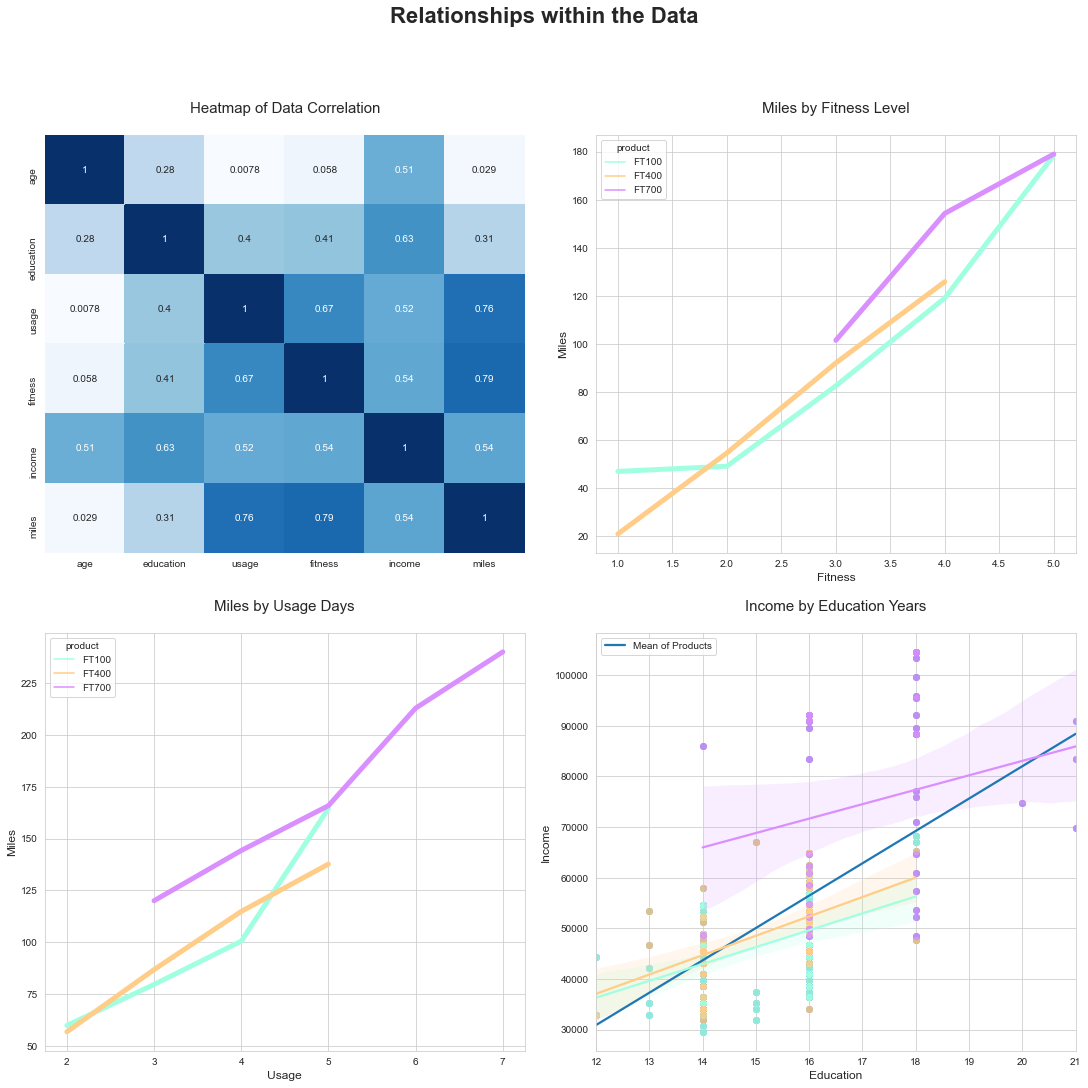

In [24]:
fig, ax = plt.subplots(2,2, constrained_layout=True)
fig.suptitle('Relationships within the Data\n\n', fontsize=22, fontweight='bold')
fig.set_size_inches(15,15)


ax1 = sns.heatmap(corr, cmap="Blues", annot=True, cbar=False, ax=ax[0,0]) # URL: https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot
ax1.set_title("Heatmap of Data Correlation\n", fontsize=15)

ax2 = sns.lineplot(x='fitness', y='miles', data=df, ci=None, hue='product', linewidth = 5, palette=productColors, ax=ax[0,1])
ax2.set_title("Miles by Fitness Level\n", fontsize=15)
ax2.set_ylabel('Miles', fontsize = 12)
ax2.set_xlabel('Fitness', fontsize = 12)

ax3 = sns.lineplot(x='usage', y='miles', data=df, ci=None, hue='product', linewidth = 5, palette=productColors, ax=ax[1,0])
ax3.set_title("Miles by Usage Days\n", fontsize=15)
ax3.set_ylabel('Miles', fontsize = 12)
ax3.set_xlabel('Usage', fontsize = 12)

productColors = ['#a1ffe1','#ffcd87','#da8fff']

ax4 = sns.regplot(x='education', y='income', data=df, ax=ax[1,1], ci=False)
ax4 = sns.regplot(x='education', y='income', data=df[df['product']=='FT100'], ax=ax[1,1], color='#a1ffe1')
ax4 = sns.regplot(x='education', y='income', data=df[df['product']=='FT400'], ax=ax[1,1], color='#ffcd87')
ax4 = sns.regplot(x='education', y='income', data=df[df['product']=='FT700'], ax=ax[1,1], color='#da8fff')
ax4.legend(['Mean of Products'],loc='upper left')
ax4.set_title("Income by Education Years\n", fontsize=15)
ax4.set_ylabel('Income', fontsize = 12)
ax4.set_xlabel('Education', fontsize = 12)

plt.show()

fig.savefig('dataRelation.png', dpi = 300)

The third dashboard covers the relationships within the data. The first heatmap plot informs the user on how each data column is correlated to each other. In this case, the darker the cell, the more the correlation between the data columns. The other 3 plots in the dashboard show the relationship between some of the data columns across the products. One compares how the level of fitness affects the miles covered, another compares how the usage days affects the miles covered and lastly, one compares how the number of education years affects the income earned by the customer. 

Through these graphs, the marketing team will understand how each data column is related to each other and what some of the interesting relationships are, so that they will be able to come up with interesting marketing tactics to appeal to the trends.


### In Conclusion

#### The FT100 is a beginner-friendly bicycle model that is also budget-friendly. As such the FT100 is the best selling bicycle model sold by the company. This bicycle appeals to all ages and genders as seen by the spread in the data.

#### The FT400 is a mid-tier bicycle that appeals to customers who has a little more money to spend as compared to the FT100. The FT400 appeals to most age groups, with the less of the older female gender buying this model.

#### The FT700 is a high-tier expensive bicycle model that appeals to customers who have money to spend and want to buy a bicycle that will be used to travel more miles, will be used more frequently and will be used by fitter people as compared to the other models. This bicycle is bought by more males across a wide spread of age than women.
